### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)

# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



In [1]:
display(1/.10)
display(1/.08)
display(1/.20)

10.0

12.5

5.0

## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

In [2]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

<IPython.core.display.Javascript object>

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 

In [3]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');
ax.set_xlim([0,2])

<IPython.core.display.Javascript object>

(0.0, 2.0)

Al comparar el esquema con los 2 primeros segundos de la señal, podemos apreciar claramente la presencia de ruido en el ECG, debido a que no es posible ver en la señal las etapas del ciclo cardíaco representadas en el esquema. La única etapa la cual es visible es la etapa **R**, pero aun pudiendo visualizarse, esta posee discontinuidades debido a la presencia de ruido. Al analizar los primeros segundos de la señal podemos observar que el único ruido apreciable a simple vista es el ruido blanco de origen térmico **(C)**, pero si nos enfocamos en la señal completa, podemos observar una tendencia debido a un ruido de baja frecuencia causado por un desperfecto del sensor **(B)**. Ni en la señal completa ni en los primeros segundos podemos observar a simple vista no el ruido asociado al sistema eléctrico **(A)**.


**¿Que es un ruido blanco?** Un ruido blanco es un ruido el cual está presente en todas las frecuencias de la señal. Este tipo de ruido se observa claramente en la señal debido a que al comparar el esquema con la señal, podemos ver que existen perturbaciones a lo largo de toda la señal.

**¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro?** Una tendencia o patrón es el comportamiento que tiene una señal debido a una perturbaciones externas. En este caso, al observar la señal completa, podemos observar una tendencia **sinusoidal**, la cual es anormal al compararla con el esquema original.


* Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases

> **Muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia**

In [4]:
import scipy.fft as sfft
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

freq = sfft.rfftfreq(n=len(data), d=1./Fs)
SA = np.absolute(sfft.rfft(data))

ax.plot(freq, SA); 
#ax.set_xlim([-1, 100]);
ax.set_xlabel('Frecuencia [Hz]');

<IPython.core.display.Javascript object>

> **Espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases**



#### Justificación

En primer lugar intentaremos obtener una buena visión general de la señal e identificar las frecuencias aproximadas en la que se encuentran los ruidos. Al utilizar una longitud de segmento Nw=512 es posible ver claramente donde se ubican los ruidos (aparte del ruido blanco), el efecto de la tendencia sobre la señal, además de un sector (frecuencia < 25 Hz) donde posiblemente se encuentra la información de interés. Se utilizó una ventana de 'hamming' con un traslape relativamente alto, considerando que la frecuencia de muestreo no es muy grande.

In [5]:
#Fs == 360
import scipy.signal
window = 'hamming'
Nw = 512

fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
freqs, times, Sxx = scipy.signal.spectrogram(data,   #'s' (2[s]) o 'data'(60[s])
                                             fs=Fs,
                                             nperseg=Nw,
                                             noverlap=Nw//1.3,
                                             window=window)
ax.pcolormesh(times, freqs, np.log10(Sxx + 1e-10), shading='auto')#, cmap=plt.cm.Reds)
ax.set_ylabel('Frequencia [Hz]');
ax.set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]")
ax.set_xlabel('Tiempo [s]'); 
plt.show()

<IPython.core.display.Javascript object>

Para observar a un nivel de detalle mayor el rango de frecuencias de un paciente normal y la zona de interés mencionada previamente, se incrementó considerablemente la resolución a nivel frecuencia, lo que nos deja con una ventana bastante larga pero nos permite ver posibles armónicos relacionados con el ciclo cardiaco. También se nota claramente la amplitud del ruido de baja frecuencia. 

In [6]:
Nw = 256*16
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True, sharex=True, sharey=True)
freqs, times, Sxx = scipy.signal.spectrogram(data,
                                             fs=Fs,
                                             nperseg=Nw, #largo de cada segmento
                                             noverlap=Nw//1.1, #Npuntos que se sobreponen
                                             window=window)
ax.pcolormesh(times, freqs, np.log10(Sxx + 1e-10), shading='auto'); 
ax.set_ylabel('Frequencia [Hz]');
ax.set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]")
ax.set_ylim([0, 20])
#ax.grid()

<IPython.core.display.Javascript object>

(0.0, 20.0)

* En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?



**(A) Un ruido asociado al sistema eléctrico**

- 60 [Hz] (+- 2 debido a la tendencia)

**(B) Un ruido de baja frecuencia causado por un desperfecto del sensor**

- < 0.5 [Hz]

**(C) Un ruido blanco de origen térmico**

- En todo el rango de frecuencias


In [7]:
fmin = 60/60 #60 pulsaciones en 60 min
fmax = 100/60 #100 pulsaciones en 60 min
print(f"El rango de frecuencias cardiacas de un humano normal en reposo se encuentra en el intervalo:"
     +f" [{fmin}, {fmax:.3f}] Hz")

El rango de frecuencias cardiacas de un humano normal en reposo se encuentra en el intervalo: [1.0, 1.667] Hz


## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

> Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Los filtros FIR, son filtros digitales cuya respuesta a un impulso unitario es de duración finita. Estos filtros se representan como una sola convolución y para definir su salida utilizan valores presentes de la entrada y valores pasados de la entrada.

Su implementación más común es mediante el **método de la ventana**, el cual es un método donde el objetivo es diseñar la respuesta al impulso a partir de una condición, la cual puede ser, eliminar o dejar todas las frecuencias sobre una frecuencia específica.

Para esto, puede implementarse distintos tipos de ventanas, como las ventanas de Hamming, ventana rectangular,ventana de Kaiser, etc.

El método de enventanado consta de los siguientes pasos:



**Método de enventanado**

A partir de un requisito como "eliminar todas las frecuencias > x"

1. Identificar las frecuencias de interés (o las frecuencias que deseamos eliminar) para  especificar una respuesta en frecuencia ideal
2. obtener la respuesta al impulso ideal por medio de la *transformada de fourier inversa*
3. truncar la respuesta al impulso ideal usando una ventana


L :  cantidad de coeficientes que tiene nuestor filtro. A mayor L, mayor es la fidelidad con respecto a la respuesta en frecuencia ideal, asi como tambien es el costo computacional

**Función `scipy.signal.firwin`**


**Argumentos**

* **numtaps:** L, numero de coeficientes que tendrá el filtro

* **cutoff:** frecuencia(s) de corte a utilizar

* **width (opcional):** Ancho de la region de transisicion (para usar con Kaiser)

* **window(opcional):** ventana a utilizar, ya sea un string (nombre) o una tupla con nombre y parametros.

* **pass_zero(opcional):** booleano (pasabajo si/no) o string [‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’] que indica el tipo de filtro a generar. relacionado con el argumento `cutoff` 

**Retorna**

h : respuesta al impulso ideal truncada (finita)

> use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido (A), el segundo el ruido (B) y el tercero el ruido (C). Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

* Considere una ventana de Hamming y 1001 coeficientes para el filtro

In [8]:
from scipy import signal
window = 'hamming'
L = 1001

In [9]:
#revisar labels
def plot_respuestas(h):
    global Fs
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
    freq, H = scipy.signal.freqz(h, fs=Fs)
    axs[0].plot(h);
    axs[0].set_title("Respuesta al impulso")
    axs[0].set_xlabel('muestras');

    axs[1].plot(freq, np.absolute(H)); 
    axs[1].set_title("Respuesta en frecuencia")
    axs[1].set_xlabel('Frecuencia [Hz]');

In [26]:
def plot_espectrograma(s, Nw=512, title=''):
    global window, Fs
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
    
    freqs, times, Sxx = scipy.signal.spectrogram(s,
                                                 fs=Fs,
                                                 nperseg=Nw,
                                                 noverlap=Nw//1.3,
                                                 window=window)
    im = ax.pcolormesh(times, freqs, np.log10(Sxx + 1e-10), shading='auto')#, cmap=plt.cm.Reds)
    fig.colorbar(im, ax=ax)
    ax.set_ylabel('Frequencia [Hz]')
    ax.set_title(f"Ventana de duración {Nw/Fs:0.4f} [s]\n{title}")
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylim([0, 70])

In [27]:
def plot_sen_restada(resta, title, Nw=512):
    global window, Fs
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
    
    freqs = sfft.fftfreq(len(resta), 1/Fs)
    #resta
    SA = np.absolute(sfft.fft(resta))
    ax.plot(sfft.fftshift(freqs),
               sfft.fftshift(SA))
    ax.set_title(f"Espectro de amplitud {title}")
    plot_espectrograma(resta, title=title)

In [28]:
def plot_signal(s, label='filtered', title='', og=None, oglabel=''):
    global time
    fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)
    
    if og is not None:
        ax.plot(time, og, alpha=0.5, label=oglabel)
        ax.plot(time, s, alpha=0.5, label=label)
        ax.legend()
    else:
        ax.plot(time, s, label=label)
    ax.set_xlim([0, 10])
    ax.set_title(title)
    plt.show()

#### (A) Un ruido asociado al sistema eléctrico

Determinamos que la frecuencia del ruido asociado al sistema eléctrico está centrada en 60 [Hz] y oscila en torno a este valor a causa de la tendencia ocasionada por el ruido de baja frecuencia. Para actuar sobre este ruido solamente, procederemos a crear un filtro **rechaza banda** que bloquee el paso de las frecuencias asociadas. En este utilizaremos como frecuencias de corte $f_{c1} < f_{c2}$ :

$f_{c1}$ = 57 
$f_{c2}$ = 63 

<IPython.core.display.Javascript object>


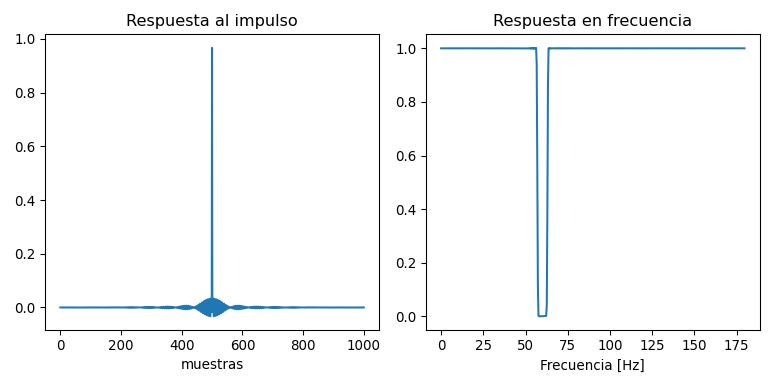

In [32]:
h_A = signal.firwin(L, [57, 63], window=window,
                    pass_zero=True, fs=Fs)
plot_respuestas(h_A)

<IPython.core.display.Javascript object>


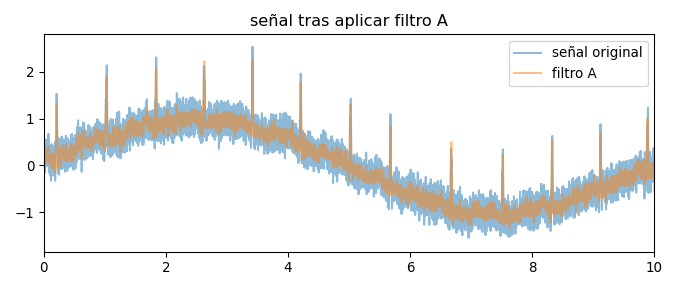

In [33]:
y_A = scipy.signal.convolve(data, h_A, mode='same')
plot_signal(y_A, label='filtro A', title='señal tras aplicar filtro A',
            og=data, oglabel='señal original')

> Calcule la resta entre la señal original y la señal filtrada. 

<IPython.core.display.Javascript object>


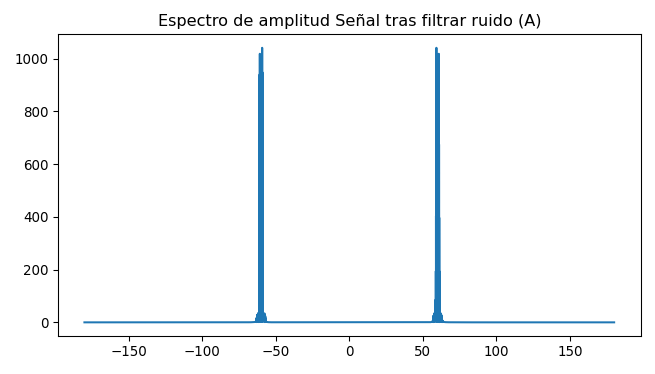

<IPython.core.display.Javascript object>


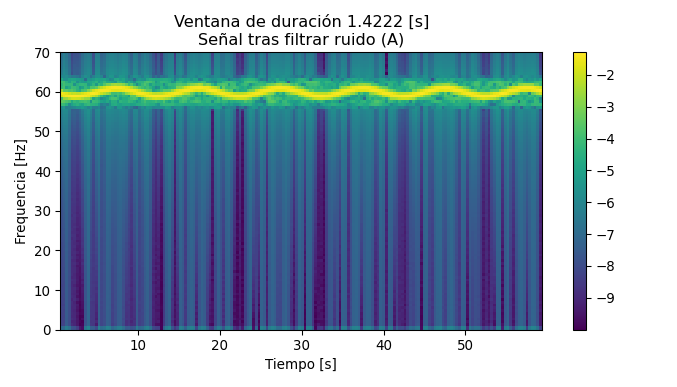

In [34]:
r_A = data - y_A
plot_sen_restada(r_A, title="Señal tras filtrar ruido (A)", Nw=512)

Al realizar la resta de la señal original con la señal filtrada, podemos apreciar claramente el segmento de señal que fue filtrado, en este caso particular, podemos observar que fue satisfactoriamente filtrado el segmento entre 57 y 63 [Hz].

#### (B) Un ruido de baja frecuencia causado por un desperfecto del sensor

Para eliminar este ruido en particular utilizamos la gráfica de la señal sin filtrar para calcular el periodo de la tendencia que esta provoca. Determinamos que el periodo es de aproximadamente 10[s] por lo que la frecuencia asociada tendrá un valor cercano a 0.1[Hz]. 

Para actuar sobre este ruido solamente, crearemos un filtro elimina banda en un rango de [0.083, 0.125] Hz.

<IPython.core.display.Javascript object>


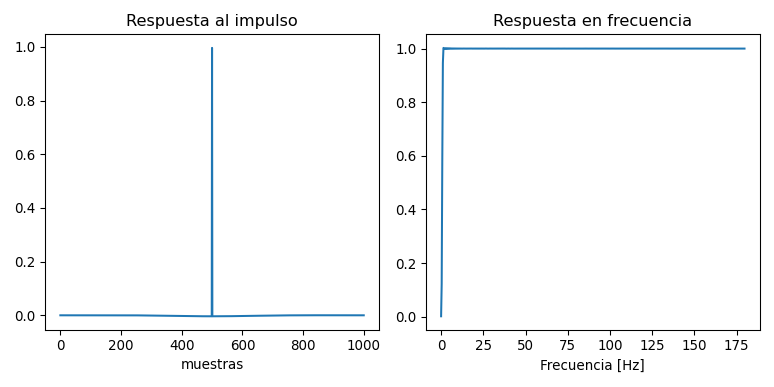

In [36]:
h_B = signal.firwin(L, 0.65, window=window,
                    pass_zero=False, fs=Fs)
plot_respuestas(h_B)

<IPython.core.display.Javascript object>


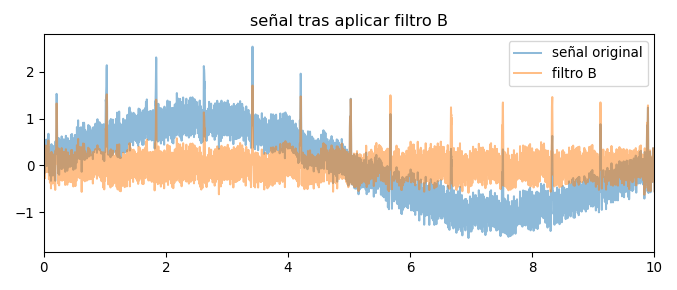

In [37]:
y_B = scipy.signal.convolve(data, h_B, mode='same')#
plot_signal(y_B, label='filtro B', title='señal tras aplicar filtro B',
            og=data, oglabel='señal original')

> Calcule la resta entre la señal original y la señal filtrada.


<IPython.core.display.Javascript object>


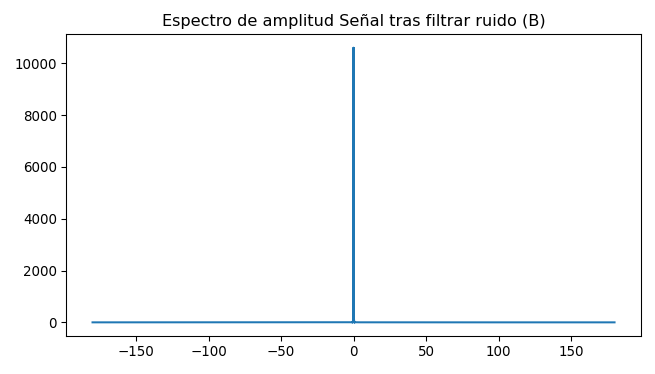

<IPython.core.display.Javascript object>


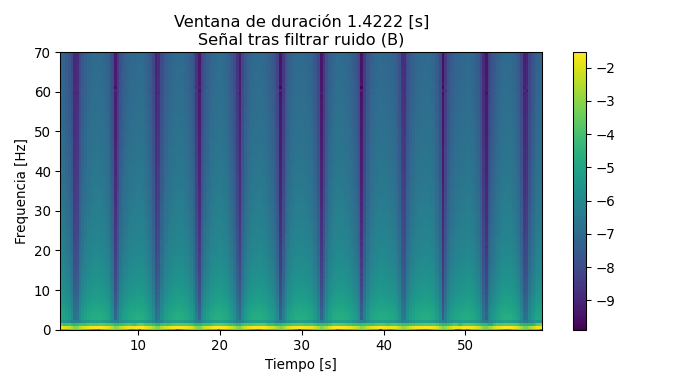

In [38]:
r_B = data - y_B
plot_sen_restada(r_B, "Señal tras filtrar ruido (B)")

No entiendo... Deberia ser igual que el filtro anterior (ver lo que se filtró), pero este mantiene el ruido, y las franja de los 60hz

#### (C) Un ruido blanco de origen térmico

Para el caso del ruido blanco, el cual no se encuentra en una frecuencia en particular, hace falta adoptar un enfoque distinto al de los otros dos ruidos. Para quitarlo haremos un filtro **bandpass** con el rango de frecuencias cardíacas de un humano sano en reposo.

¿Agregar un margen como dijo el profe?


<IPython.core.display.Javascript object>


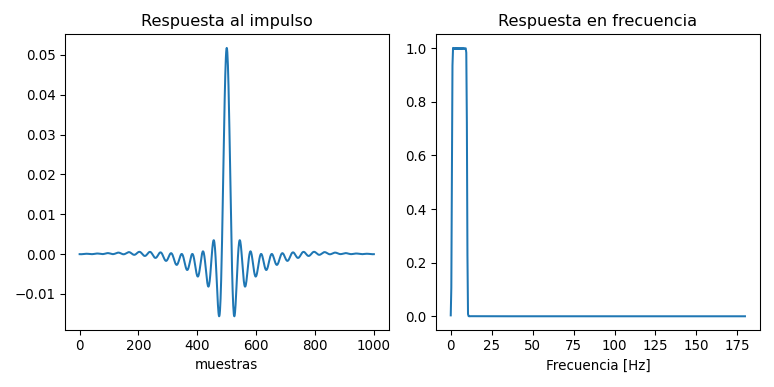

In [39]:
h_C = signal.firwin(L, [.67, 10], window=window,
                    pass_zero='bandpass', fs=Fs)
plot_respuestas(h_C)

<IPython.core.display.Javascript object>


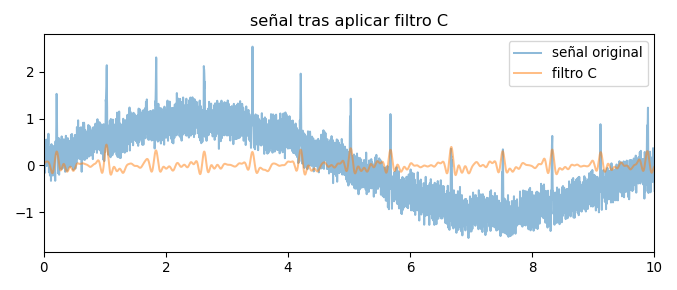

In [40]:
y_C = scipy.signal.convolve(data, h_C, mode='same')
plot_signal(y_C, label='filtro C', title='señal tras aplicar filtro C',
            og=data, oglabel='señal original')

> Calcule la resta entre la señal original y la señal filtrada.
 

<IPython.core.display.Javascript object>


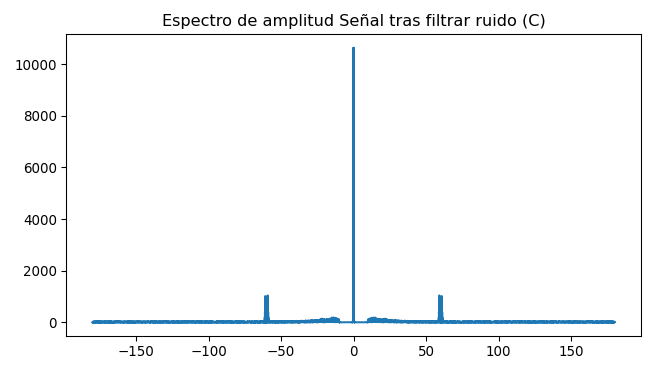

<IPython.core.display.Javascript object>


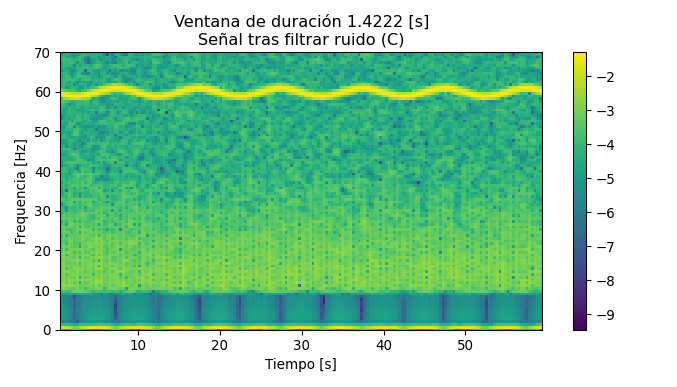

In [41]:
r_C = data - y_C
plot_sen_restada(r_C, "Señal tras filtrar ruido (C)")

Como al hacer un filtrado pasa banda, mantenemos solo la información dentro del rango establecido, al hacer la resta de la señal orginal menos la filtrada, podemos apreciar lo que no es eliminado por el filtro (a diferencia del filtro A)

> Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente.



In [42]:
data_filtrada_fir = scipy.signal.convolve(data, h_A, mode='same')
data_filtrada_fir = scipy.signal.convolve(data_filtrada_fir, h_B, mode='same')
data_filtrada_fir = scipy.signal.convolve(data_filtrada_fir, h_C, mode='same')

<IPython.core.display.Javascript object>


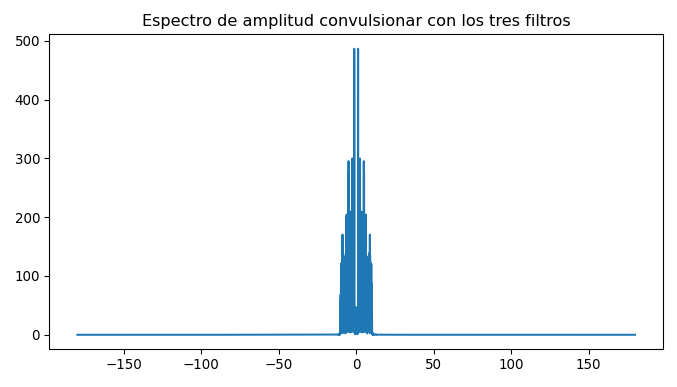

<IPython.core.display.Javascript object>


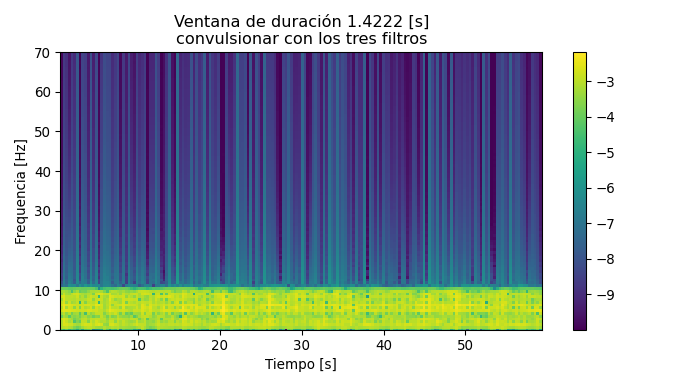

In [43]:
plot_sen_restada(data_filtrada_fir, "convulsionar con los tres filtros")

Podemos observar en el espectrograma como los 3 filtros fueron aplicados y tenemos una señal limpia, sin ruido blanco debido a un origen térmico (C), sin ruido asociado al sistema eléctrico (A) y sin ruido de baja frecuencia causado por un desperfecto del sensor (B). Donde podemos observar una clara señal que pertenece a las frecuencias bajas.

> Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada. 

<IPython.core.display.Javascript object>


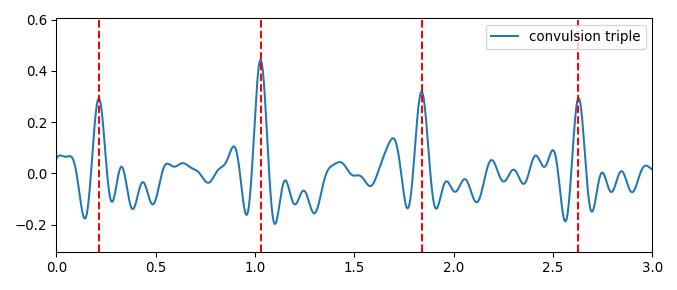

In [46]:
from scipy.signal import argrelmax


xpos = argrelmax(data_filtrada_fir, order=Fs//2)[0]
fig, ax = plt.subplots(figsize=(7,3), tight_layout=True)
ax.plot(time, data_filtrada_fir, label="convulsion triple")
for xc in xpos:
    ax.axvline(x=time[xc], color='r', linestyle='--')
ax.legend()
ax.set_xlim([0, 3])
plt.show()

> Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

In [50]:
def tiempo_rr(data, time, xpos=None):
    if xpos is None:
        xpos = argrelmax(data_filtrada_fir, order=Fs//2)[0]
    freqs = []
    times = []
    for i in range(len(xpos) - 1):
        freqs.append(1/(time[xpos[i+1]] - time[xpos[i]]))
        times.append(time[xpos[i]])
    return freqs, times

<IPython.core.display.Javascript object>


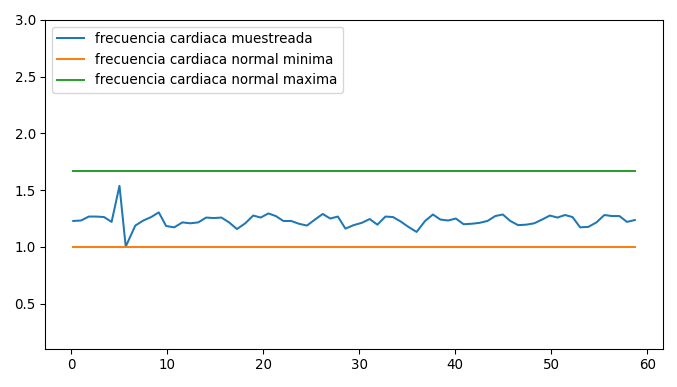

(0.1, 3.0)

In [51]:
f, t = tiempo_rr(data_filtrada_fir, time, xpos=xpos)
fig, ax = plt.subplots(figsize=(7,4), tight_layout=True)
ax.plot(t, f, label='frecuencia cardiaca muestreada')
ax.plot(t, np.repeat(fmin, len(t)), label='frecuencia cardiaca normal minima')
ax.plot(t, np.repeat(fmax, len(t)), label='frecuencia cardiaca normal maxima')
ax.legend(loc='upper left')
ax.set_ylim([0.1, 3.0])

#### Respuesta

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


> Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.


Los filtros de respuesta infinita al impulso (IIR), son filtros digitales los cuales para definir la salida al impulso utilizan las entradas presentes, entradas pasadas y **salidas pasadas**.

Algunas de las diferencias de los filtros IIR con los filtros FIR son las siguientes:

* Los filtros IIR incorporan recursividad a diferencia de los filtros FIR.
* Los filtros FIR son un filtro IIR con denominador a = 1.
* Los filtros FIR son más estables que los filtros IIR, pero IIR es más eficiente al entregar mejores resultados utilizando un menor número de coeficientes.
* Los filtros FIR utilizan desfase constante en contraste con los filtros IIR que depende de la frecuencia.


`scipy.signal.iirfilter`

**Argumentos**

**N :** orden del filtro (n coeficientes en b y a)

**Wn:** frecuencia(s) de corte a utilizar

**btype:** string [‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’] que indica el tipo de filtro a generar. 

**ftype:** string con el tipo de filtro IIR a diseñar ['butter', 'cheby1', 'cheby2', 'ellip', 'bessel']

**output:** formato de la salida 'ba': numerador/denominador, 'zpk' polos y ceros, 'sos' secciones de segundo orden.

**Retorna**

el filtro dependiendo del argumento entregado en `output`. por defecto coeficientes b y a (output='ba')

> Use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

In [52]:
from scipy.signal import butter

> encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. 

In [83]:
fir_var = np.var(data_filtrada_fir)

freq_corte_norm = np.array([[57., 63.], [0.65, 0.65], [0.67, 10.]])
freq_corte_norm = 2 * freq_corte_norm/ Fs

freqs = freq_corte_norm.tolist()
#freqs = [freq_corte_norm[2, :].tolist()]

freqs[1] = freq_corte_norm[1, 0]
b_types = ['bandstop', 'highpass', 'bandpass']
#b_types = ['bandpass']

In [84]:
freqs

[[0.31666666666666665, 0.35],
 0.0036111111111111114,
 [0.0037222222222222223, 0.05555555555555555]]

In [90]:
N = 1
mse_diff = False
mse_best = np.inf

while (N < 20 and not mse_diff):
    filtros = []
    for (fc, btype) in zip(freqs, b_types):
        sos = scipy.signal.iirfilter(N, fc, btype=btype, ftype='butter', output='sos')
        filtros.append(sos)

    data_filtrada_iir = np.copy(data)
    for sos in filtros:
        data_filtrada_iir = scipy.signal.sosfiltfilt(sos, data_filtrada_iir)
        
    mse = np.mean((data_filtrada_iir - data_filtrada_fir)**2)

    print(f"N : {N}, mse : {mse:.5f}\t|\t0.01*fir_var : {0.01*fir_var:.5f}")
    if (mse < mse_best):
        mse_best = mse
        best_N = N
        best_data_iir = np.copy(data_filtrada_iir)
        
    if (mse < 0.01*fir_var):
        mse_diff = True
        print("bingo")

    else:
        N += 1
        
print(f"mejor N : {best_N}, mse : {mse_best:.5f}")

N : 1, mse : 0.00208	|	0.01*fir_var : 0.00011
N : 2, mse : 0.00088	|	0.01*fir_var : 0.00011
N : 3, mse : 0.00050	|	0.01*fir_var : 0.00011
N : 4, mse : 0.00034	|	0.01*fir_var : 0.00011
N : 5, mse : 0.00026	|	0.01*fir_var : 0.00011
N : 6, mse : 0.00019	|	0.01*fir_var : 0.00011
N : 7, mse : 0.00015	|	0.01*fir_var : 0.00011
N : 8, mse : 0.00013	|	0.01*fir_var : 0.00011
N : 9, mse : 0.00013	|	0.01*fir_var : 0.00011
N : 10, mse : 0.00011	|	0.01*fir_var : 0.00011
N : 11, mse : 0.00009	|	0.01*fir_var : 0.00011
bingo
mejor N : 11, mse : 0.00009


<IPython.core.display.Javascript object>


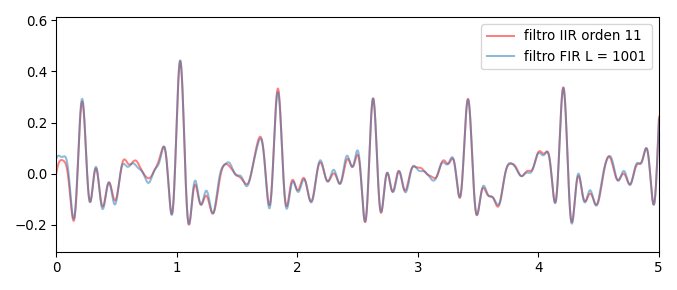

In [91]:
fig, axd = plt.subplots(figsize=(7,3), tight_layout=True)
axd.plot(time, best_data_iir, alpha=0.5, c='r', label=f'filtro IIR orden {best_N}')
axd.plot(time, data_filtrada_fir, alpha=0.5, label=f'filtro FIR L = {L}')
axd.set_xlim([0, 5])
axd.legend()

> Discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR

#### Respuesta

### anexo: rutina con BA xd

In [88]:
N = 1
mse_diff = False
mse_best = np.inf

while (N < 5 and not mse_diff):
    filtros = []
    for (fc, btype) in zip(freqs, b_types):
        b, a = butter(N, Wn=fc, btype=btype, output='ba', analog=False)
        filtros.append([b, a])

    data_filtrada_iir = np.copy(data)
    for [b, a] in filtros:
        #zi = signal.lfilter_zi(b, a)
        #data_filtrada_iir, _ = signal.lfilter(b, a, data_filtrada_iir, zi=zi)
        data_filtrada_iir = signal.lfilter(b, a, data_filtrada_iir)
        
    mse = np.mean((data_filtrada_iir - data_filtrada_fir)**2)

    print(f"N : {N}, mse : {mse:.5f}\t|\t0.01*fir_var : {0.01*fir_var:.5f}")
    if (mse < mse_best):
        mse_best = mse
        best_N = N
        best_data_iir = np.copy(data_filtrada_iir)
        
    if (mse < 0.01*fir_var):
        mse_diff = True
        print("bingo")
        
    else:
        N += 1
        
print(f"mejor N : {best_N}, mse : {mse_best:.5f}")

N : 1, mse : 0.00746	|	0.01*fir_var : 0.00011
N : 2, mse : 0.01024	|	0.01*fir_var : 0.00011
N : 3, mse : 0.01582	|	0.01*fir_var : 0.00011
N : 4, mse : 0.02136	|	0.01*fir_var : 0.00011
mejor N : 1, mse : 0.00746
